In [41]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [42]:
dataFrame = pd.read_csv('Mall_Customers.csv')

In [43]:
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
dataFrame = dataFrame.dropna(subset=features)
dataset = dataFrame[features].copy()
dataset.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [44]:
dataset = dataset / (10 ** (np.ceil(np.log10(np.max(np.abs(dataset)))))) * 9 + 1
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,4.496500,1.545040,5.518000
std,1.257211,0.236382,2.324117
min,2.620000,1.135000,1.090000
25%,3.587500,1.373500,4.127500
50%,4.240000,1.553500,5.500000
75%,5.410000,1.702000,7.570000
max,7.300000,2.233000,9.910000


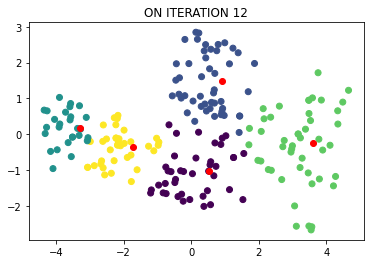

array([0, 4, 3, 4, 0, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 0, 4, 3, 2, 0, 4,
       3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 1, 2, 1, 4,
       3, 4, 1, 0, 0, 0, 1, 4, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       4, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 4, 1, 2, 3, 4, 3, 4,
       0, 4, 3, 2, 3, 4, 3, 4, 3, 2, 0, 2, 3, 2, 1, 4, 3, 2, 3, 2, 3, 4,
       3, 2, 3, 4, 3, 4, 1, 2, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3, 2, 3, 2,
       3, 4, 3, 2, 0, 2, 3, 2, 0, 2, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4,
       3, 2], dtype=int64)

In [78]:
def euclidean_distance(x, y):
    return np.sqrt(((x - y) ** 2).sum())
    
class KMeans:
    def __init__(self, k, max_iter=100, random_state=42):
        self.k = k
        self.max_iter = max_iter
        self.centroids = None
        self.clusters = [[]]*self.k
        self.X = None
        self.random_state = random_state
    
    def set_random_centroids(self):
        centroids = []
        for i in range(self.k):
            centroid = self.X.apply(lambda x : float(x.sample()))
            centroids.append(centroid)
    #     print(np.array(centroids))
        return np.array(centroids)

    def assign_clusters(self):
        clusters = []
        for i in range(self.n_samples):
            distances = []
            for j in range(self.k):
                distance = euclidean_distance(self.X.loc[i], self.centroids[j])
                distances.append(distance)
            clusters.append(np.argmin(distances))
        return np.array(clusters)
    
    def update_centroids(self):
        new_centroids = []
        clusters_points = list(set(self.clusters))
        for point in clusters_points:
            new_centroids.append(self.X[self.clusters == point].mean(axis=0))
        return np.array(new_centroids)
    
    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = self.X.shape
        self.centroids = self.set_random_centroids()
        self.iteration_count = 0
        for _ in range(self.max_iter):
            self.clusters = self.assign_clusters()
            old_centroids = self.centroids.copy()
            self.centroids = self.update_centroids()
            self.iteration_count += 1
            self.plot_clusters(iteration_count=self.iteration_count)

            if np.subtract(self.centroids, old_centroids).sum() == 0:
                break
        return self.clusters
    
    def plot_clusters(self, iteration_count):
        pca = PCA(n_components=2)
        dataset_2d = pca.fit_transform(self.X)
        centroids_2d = pca.fit_transform(self.centroids)
        clear_output(wait=True)
        plt.title(f"ON ITERATION {iteration_count}")
        plt.scatter(x=dataset_2d[:, 0], y=dataset_2d[:, 1], c=self.clusters)
        plt.scatter(x=centroids_2d[:, 0], y=centroids_2d[:, 1], c="red")
        plt.show()
        
    def cost_(self):
        cost = 0
        for i in range(self.n_samples):
            centroid = self.centroids[self.clusters[i]]
            distance = np.linalg.norm(self.X.loc[i] - centroid)
            cost += distance ** 2
        return cost
    
kmeans = KMeans(k=5, max_iter=100)
res = kmeans.fit(dataset)
res

In [79]:
cost = kmeans.cost_()
cost

204.11818778604442

In [80]:
from sklearn.cluster import KMeans

# Assuming you have a dataset 'X' and the desired number of clusters 'n_clusters'

# Create an instance of KMeans
kmeans = KMeans(n_clusters=5)

# Fit the K-means algorithm to the data
kmeans.fit(dataset)

# Get the cost function value
cost = kmeans.inertia_
print("Cost function value:", cost)

Cost function value: 203.60848972729198
